# Modelo Cero Dimensional de Balance de Energía

**Sofía Giordano , Ana Martínez, Claudio Pierard**

### Resumen

Se construyó un Modelo de Balance de Energía (EBM) deOrden Cero con el fin de obtener la temperatura de equilibrio de este bajo diferentes supuestos. Dichos supuestos fueron mediados por parámetros tales como el albedo y la emisividad, así como las variaciones en la constante solar. Se encontró que bajo ciertas combinaciones de albedo-emisividad, la temperatura de la Tierra puede aumentar o disminuir de manera significativa, mientras que los efectos en la variación de la constante solar son menos influyentes.

### Introducción

El sistema climático es un conjunto de subsistemas : atmósfera, hidrosfera, criosfera y biosfera, entre los cuales existen intercambios de materia y energía, dando como resultado variaciones climáticas en el planeta.
Para simular al sistema climático se utilizan modelos en diferentes escalas espaciales y temporales. En general, en los modelos se consideran efectos radiativos, dinámicos y en superficie [1], de manera que para simular dichos procesos, se utilizan principios básicos de la física. En este caso se utilizó un modelo de orden cero, es decir, un modelo simple en donde no se toma en cuenta todos los flujos de energía y materia entre los subsistemas antes mencionados, más bien  sólo se toma en cuenta un balance de energía entre la radiación solar incidente en la Tierra y la radiación emitida de vuelta al espacio por la Tierra. Además se considera a la Tierra como un planeta esférico, homogéneo y cubierto sólo de agua. Estos modelos sencillos, aunque imprecisos, proporcionan una gran cantidad de información útil para el estudio de modelos de mayor complejidad.[2]

Dicho sistema puede ser descrito con las leyes de la termodinámica. La Primera Ley de la Termodinámica establece que \textit{"La variación de energía interna del sistema es igual a la diferencia entre el calor aportado al sistema y el trabajo realizado por el mismo"}[3], 

$$\Delta U = Q - W.$$

Considerando que el sistema climático no realiza ningún trabajo ($W=0$), la ecuación se simplifica a:

$$U = Q,$$

donde $Q$ es el calor y está dada por: 

$$Q = C_v \frac{\partial T}{\partial t},$$

donde $C_v = 2e8 $, es la capicidad calorífica. 

El balance de energía se da entre la radiación solar recibida, de magnitud $S / 4$ y la radiación solar reflejada, $\alpha S$ y la radiación infrarroja emitada, $\sigma T^4$, puede igualarse con el calor: 

$$C_v \frac{\partial T}{\partial t} = A_1(1- \alpha) S - A_2 \sigma T^4,$$

donde $S = 1370\ Wm^{-2}$ es la "constante solar", $\sigma = 5.67e-8\ Wm^{-2}K^{-4}$ es la constante de Boltzmann, $T$ es la temperatura, $A_1$ es el área que es irradiada por el Sol y $A_2$ es la superficie del planeta. Igualando $\frac{\delta T}{\delta t}=0$.

$$A_1(1 - \alpha)S = A_2 \sigma T^4,$$

El área $A_1$, es el área de la cara del planeta que es irradiado por el Sol, el cual se puede considerar como un círculo de área:

$$ A_1 = \pi r^2.$$

Mientras que el área $A_2$ es la superficie de todo el planeta:

$$ A_2 = 4 \pi r^2.$$

Por tanto, la ecuación queda como:

$$\pi r^2 (1-\alpha)S = 4 \pi r^2 \sigma T^4,$$

$$\frac{(1-\alpha)S}{4} = \epsilon \sigma T^4.$$

El coeficiente de emisividad $\epsilon$ indica la capacidad de un objeto para emitir energía infrarroja. Si $\epsilon = 1$, emite todo lo que absorbe.

Finalmente, regresando a la ecuación diferencial, se tiene la siguiente ecuación a resolver:

$$ \frac{\partial T}{\partial t} = \frac{1}{C_v} \bigg [\frac{(1- \alpha) S}{4} - \epsilon \sigma T^4 \bigg] .$$

#### Método numérico

Por diferencias finitas se resuelve la siguiente ecuación diferencial:

$$ \frac{\partial T}{\partial t}  = \frac{1}{C_v} \bigg [\frac{(1- \alpha) S}{4} - \epsilon \sigma T^4 \bigg].$$

Usando la formula para diferncias finitas:

$$ \frac{\partial T}{\partial t} = \frac{T(n+1) - T(n)}{\delta t} = f(x),$$

$$T(n+1) = T(n) + \delta t f(x).$$

Donde la función $f(x)$ es:

$$ f(x) = \frac{1}{C_v} \bigg [\frac{(1- \alpha) S}{4} - \epsilon \sigma T^4 \bigg].$$

Entonces, el algoritmo queda como:

$$T(n+1) = T(n) + \frac{\delta t}{ C_v} \bigg [\frac{(1- \alpha) S}{4} - \epsilon \sigma T^4 \bigg].$$



### Experimentación

Al iterar el algoritmo un número determinado de veces, se observa que la temperatura alcanza un balance, es decir, converge a una temperatura de equilibrio. El tiempo en que se alcanza la temperatura de equilibrio, está definido por un valor de tolerancia $\gamma$. Si

$$ \gamma > \mid T(n-1) - T(n)\mid,$$

entonces la computadora deja de iterar y se obtiene la temperatura de equilibrio. $T(n)$ es la temperatura calculada en esa iteración, mientras que $T(n-1)$ es la temperatura obtenida en la anterior iteración de la que se está llevando a cabo. Para la función usada para iterar, se definó $\gamma = 0.001$.

En el modelo de orden cero, la Tierra tiene un albedo promedio de $\alpha = 0.3$ y una emisitividad de $\epsilon = 0.6$, por tanto para la primera parte del experimento se fijaron estos parámetros con los valores mencionados y se calculó la temperatura de equilibrio de la supercie terrestre. Se obtuvo que el tiempo en que converge a su temperatura de equilibrio es de $4568$ días o $12.52$ años, y su temperatura de equilibrio es de $303.17\ K$. En la fFigura 1 se muestra como la temperatura converge a la temperatura de equilibrio conforme avanza el tiempo. 

In [5]:
using PyPlot

In [6]:
δt = 24*3600
γ = 0.0001

0.0001

In [7]:
Ta = 250   #rango en el que da la temperatura aleatoria. 
Tb = 370
#T_aleatoria = Ta + (Tb-Ta)*(rand(1)[1]) 

function modeloOrdenCero(α, ϵ, δt, γ, T0 = Ta + (Tb-Ta)*(rand(1)[1]), iteraciones=0) #T0 es un valor de entrada que no se está obligado
    #a ingresar, es decir, si no se pone, la función genera una temperatura aleatoria.

    Temp = Any[] 
    C_v = 2e8  
    σ = 5.67e-8
    S = 1366
                                   
    diferencia = 1
    
    if iteraciones == 0
    
        while diferencia > γ
    
            T_nueva = T0 + δt.*((1-α)S/4 -ϵ.*σ.*T0^4)/(C_v)
        
            push!(Temp, T_nueva)  
        
            diferencia = abs(T_nueva - T0) 
        
            T0 = T_nueva  
        
        end
        
    else
        for i in 1:iteraciones
    
            T_nueva = T0 + δt.*((1-α)S/4 -ϵ.*σ.*T0^4)/(C_v)
        
            push!(Temp, T_nueva)  
        
            T0 = T_nueva  
        end
        
    end

    M = [i for i in 1:length(Temp)] 
    plot(M, Temp, label="a=$α, \ E=$ϵ")
    
    xlabel("Tiempo [días]")
    ylabel("Temperatura [K]")
    
    Temp[length(Temp)], length(Temp)/365 #Regresa dos valores: temp. de equilibrio y tiempo en años.
    
end

modeloOrdenCero (generic function with 3 methods)

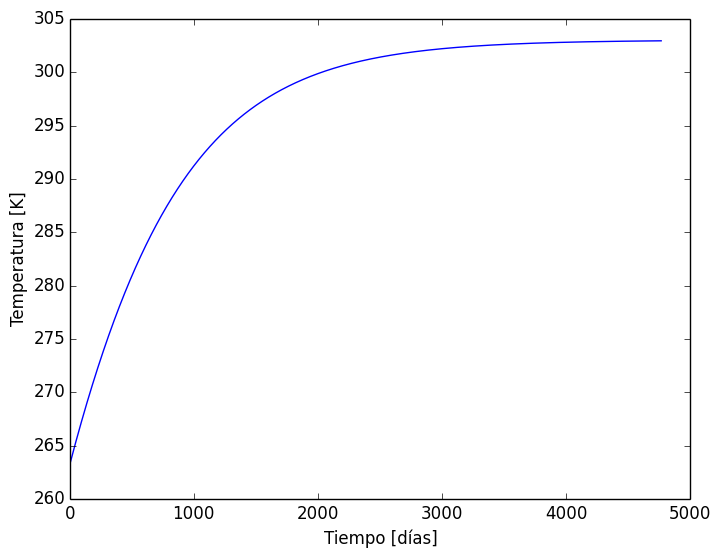

(302.95556805717024,13.063013698630137)

In [8]:
P1, t1 = modeloOrdenCero(0.3, 0.5,δt, γ)

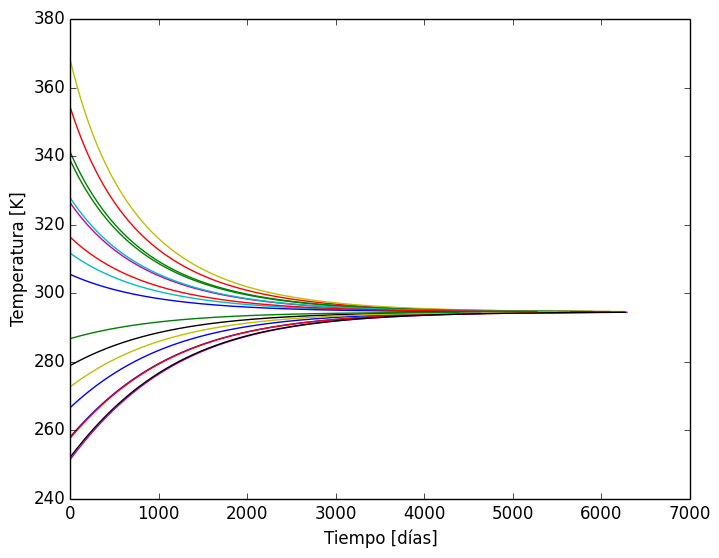

In [10]:
for i in 1:17
    
    modeloOrdenCero(.5, .4, δt, γ)
    
end

También se calculó la temperatura de equilibrio analíticamente, usando la ecuación del balance de radiación cuando T no varía en el tiempo, donde se despeja T para encontrar el valor de la temperatura analíticamente:

$$\frac{(1-\alpha)S}{4} = \epsilon \sigma T^4,$$

$$T = \bigg (\frac{(1-\alpha)S}{4\epsilon \sigma} \bigg )^{1/4}.$$

Sustituyendo $\alpha = 0.1$ y $\epsilon = 0.5$, se obtuvo una temperatura de equilibrio de $322.91 \ K$, lo cual es mucho mayor al obtenido numéricamete. 

La **siguiente etapa** del experimento consistió en cambiar los parámetros de la radiación solar reflejada, $ \alpha,$ y de la emisividad, $\epsilon$, para ver cómo cambian las temperaturas de equilibrio en cada caso. Se realizaron tres casos:

**Caso 1:** $\alpha = 1$, variando $\epsilon$.

En este caso se supone un valor para el albedo de $100 \%$, reflejando así toda la radición que llega a la Tierra. Conforme varían el parámetro $\epsilon$ (varía entre cero y uno), se observa que entre más grande sea, más fría es la temperatura de equilibrio alcanzada.
Se consideraron 3 diferentes valores de emisividad, tomando los valores extremos y el central, dichos valores son: $\epsilon = 0.01, 0.5$ y $1$. En la gráfica es observable que los valores de temperatura alcanzan un máximo cuando la emisividad es menor.  Los valores obtenidos para cada $\epsilon$ son los siguientes: 

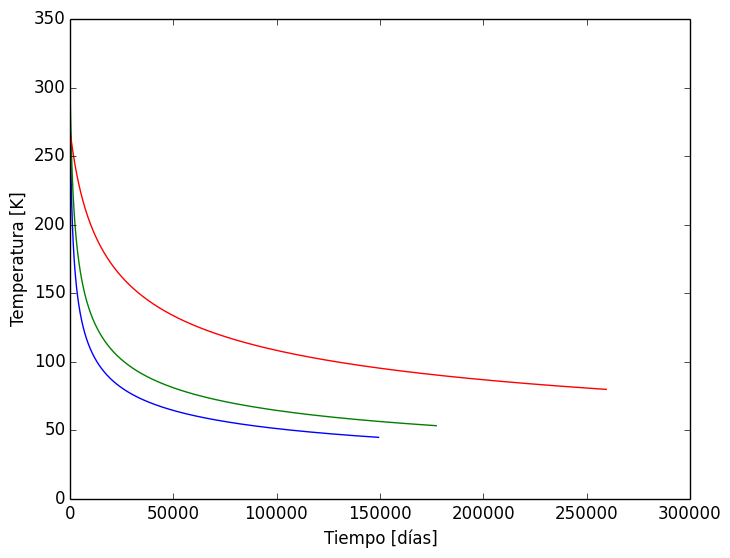

(79.93416216317435,710.9123287671233)

In [11]:
m = modeloOrdenCero(1, 1,δt, γ)
n = modeloOrdenCero(1, 0.5,δt, γ)
l = modeloOrdenCero(1, 0.1,δt, γ)

In [12]:
[m, n, l] #enlisto la (temp_equilibrio, tiempo_equilibrio)

3-element Array{Tuple{Float64,Float64},1}:
 (44.95018603269377,409.09589041095893)
 (53.455131442235945,485.5452054794521)
 (79.93416216317435,710.9123287671233) 

Temperaturas de equilibrio:
- $\epsilon=1$: $T_{eq}=44.95K$. 
- $\epsilon=0.05$: $T_{eq}=53.45K$. 
- $\epsilon=0.01$: $T_{eq}=79.93K$.


**Caso 2:** $\epsilon = 0.01$, variando $\alpha$.
Para este caso se considera un valor contante de $\epsilon = 0.01 $, dicho valor indica que la Tierra emite muy poca radiación del total que absorbe, pues como se mencionó anteriormente cuando $\epsilon = 1$ es cuando es máximo y emite toda la energía que absorbe. Los valores obtenidos son los siguientes:

- $\alpha=0.05$ $[T_{eq}=870.21K]$,
- $\alpha=0.35$ $[T_{eq}=791.38K]$, 
- $\alpha=0.70$ $[T_{eq}=652.08K]$, 
- $\alpha=0.85$ $[T_{eq}=548.02K]$.

Cada uno representando diferentes coberturas en la superficie terrestre.

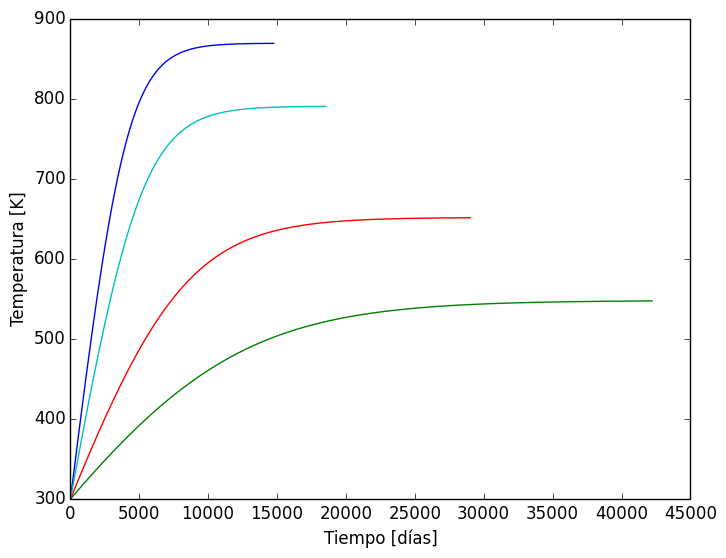

(790.8006927985987,50.797260273972604)

In [13]:
k0 = 300
x = modeloOrdenCero(0.05, 0.01,δt, γ, k0 )
y = modeloOrdenCero(0.85, 0.01,δt, γ, k0)
z = modeloOrdenCero(0.70, 0.01,δt, γ, k0)
w = modeloOrdenCero(0.35, 0.01,δt, γ, k0)

In [14]:
[x, y, z, w] #enlisto la (temp_equilibrio, tiempo_equilibrio)

4-element Array{Tuple{Float64,Float64},1}:
 (869.5717100459638,40.42191780821918) 
 (547.6247725232955,115.66027397260274)
 (651.6084427296131,79.53972602739726) 
 (790.8006927985987,50.797260273972604)

**Caso 3:** $\alpha = 0.3$ , variando $\epsilon$.
En este último caso, se supone el albedo como constante, manteniendo un valor equivalente al albedo promedio, dado que no existe la capacidad por parte de la atmósfera de reflejar una gran cantidad de la energía que recibe, se produce un calentamiento del sistema. Los resultados a dichas variaciones se presentan a continuación:

- $\epsilon=1$: $[T_{eq}=221.80K]$,
- $\epsilon=0.7$ $[T_{eq}=278.5K]$,
- $\epsilon=5$ $[T_{eq}=303.32K]$,
- $\epsilon=0.3$ $[T_{eq}=344.47K]$.

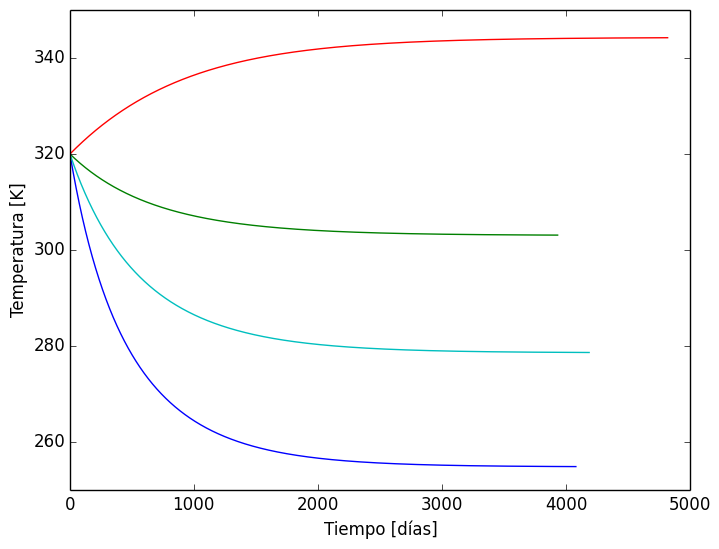

(278.64853090850687,11.471232876712328)

In [15]:
a = modeloOrdenCero(0.3, 1,δt, γ, 320)
b = modeloOrdenCero(0.3, 0.5,δt, γ, 320)
c = modeloOrdenCero(0.3, 0.3,δt, γ, 320)
d = modeloOrdenCero(0.3, 0.7,δt, γ, 320)

In [16]:
[a,b,c,d]

4-element Array{Tuple{Float64,Float64},1}:
 (254.87734779843314,11.178082191780822)
 (303.10195611423285,10.775342465753425)
 (344.2240095489845,13.205479452054794) 
 (278.64853090850687,11.471232876712328)

La **variabilidad solar** son ciclos de $11$ años de duración [1], donde el Sol emite un máximo de energía, para después entrar en un mínimo, donde emite menos energía. Durante este periodo la constante solar varía entre $1355 \ Wm^{-2}$, en el mínimo, y $1367 \ Wm^{-2}$ en el máximo. 

Para expresar esta variación de la intensidad solar, ajustamos una función seno donde su máximo sea de $1367\ Wm^{-2}$ y su mínimo de $1365\ Wm^{-2}$, en un periodo de $11$ años. 

$$ S = S_0 + 2sin(2\pi \nu t),$$

donde $\nu = \frac{1}{T}$, $T = 11*365$ días y $S_0 = 1365$. 

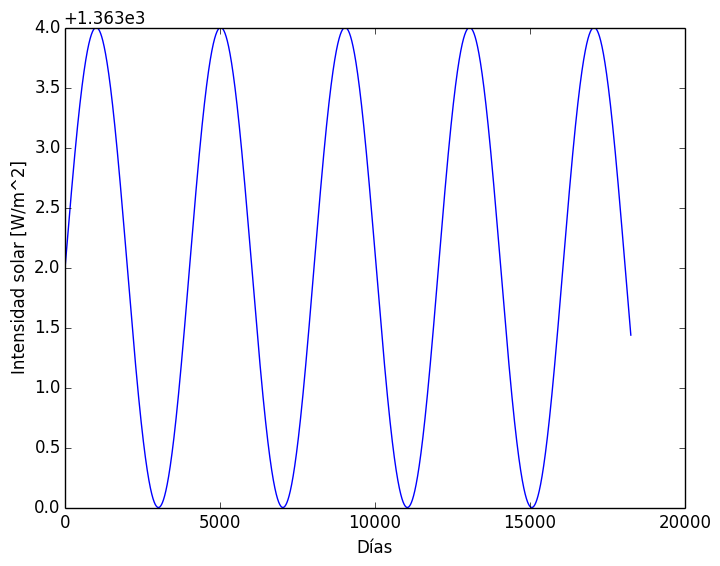

PyObject <matplotlib.text.Text object at 0x316303050>

In [17]:
S = Any[]

ν = 1/(11*365)

for t in 1:50*365
    
    s = 1365 + 2*sin(2*pi*ν*t)
    
    push!(S,s)
    
end
    
N = [i for i in 1:length(S)]

plot(N,S)
ylabel("Intensidad solar [W/m^2]")
xlabel("Días")

In [18]:
function ordenCero_VariabilidaSolar(α, ϵ, δt, iteraciones, T0 = Ta + (Tb-Ta)*(rand(1)[1]))
    
    Temp = Any[] 
    
    C_v = 2e8  
    σ = 5.67e-8
    
    for t in 1:iteraciones
        
        S = 1365 + 2*sin(2*pi*ν*t)
        
        T_nueva = T0 + δt.*((1-α)S/4 -ϵ.*σ.*T0^4)/(C_v)
        
        push!(Temp, T_nueva)  
        
        diferencia = abs(T_nueva - T0) 
        
        T0 = T_nueva  
        
    end

    M = [i for i in 1:length(Temp)] 
    plot(M, Temp)
    
    xlabel("Tiempo [días]")
    ylabel("Temperatura [K]")
    
    Temp #Saca el arreglo con las temperaturas.
end

ordenCero_VariabilidaSolar (generic function with 2 methods)

En la figura 5 se muestra cómo varían las temperaturas en ambos modelos, fijando los parámetros $\alpha = 0.3$ y $\epsilon = 0.6$, con una temperatura inicial de $293 \ K$. Para el modelo que considera constante la intensidad solar, se usó el promedio de la variabilidad solar, es decir, $S = 1366\ Wm^{-2}$. 

Se calculó el promedio de la temperatura que considera la variabilidad solar, que resultó ser de $289.4996\ K$, con un máximo (una vez alcanzado su equilibrio) de $289.5453\ K$ y un mínimo de $289.4022K$, es decir que varía $0.1430\ K$ cada once años.

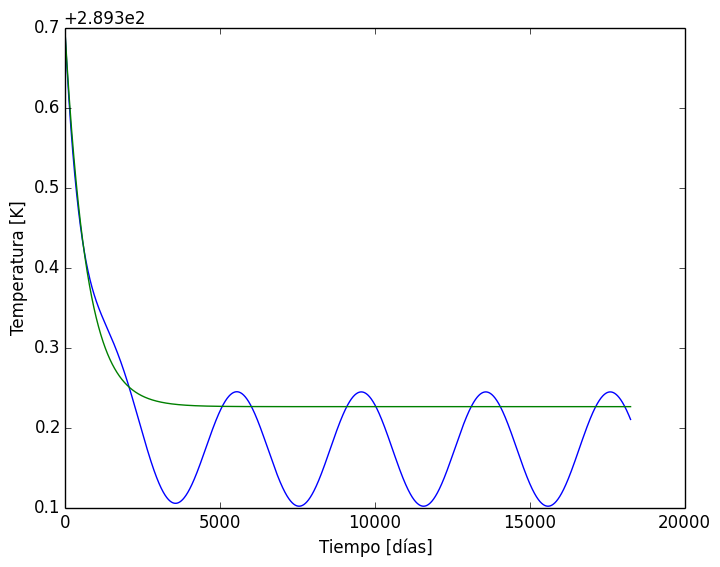

(289.5266929133085,50.0)

In [19]:
Temp_1 = ordenCero_VariabilidaSolar(0.3, .6, δt, 365*50, 290)

Temp_final, tiempo = modeloOrdenCero(0.3, 0.6, δt, γ, 290, 365*50)

In [20]:
Promedio_Temp_1 = sum(Temp_1)/length(Temp_1)

289.49969257137144

In [21]:
Promedio_Temp_1 - Temp_final

-0.02700034193708234

In [22]:
Temp_estable = Any[]

for i in 5000:length(Temp_1)
    
    push!(Temp_estable, Temp_1[i])
    
end

maximum(Temp_estable), minimum(Temp_estable), maximum(Temp_estable) - minimum(Temp_estable)

(289.5453294683921,289.4022303613535,0.1430991070386085)

Para comparar la importancia de la variabilidad de la radiación solar con  el efecto invernadero, se corrieron ambos modelos para distintos valores de emitancia, con $\alpha=0.3$ para todos los casos, en un periodo de 50 años (figura 6). De nuevo se puede constatar que el modelo que considera la variabilidad de la radiación, se comporta muy parecido al que no considera esta oscilación en la intensidad solar. 

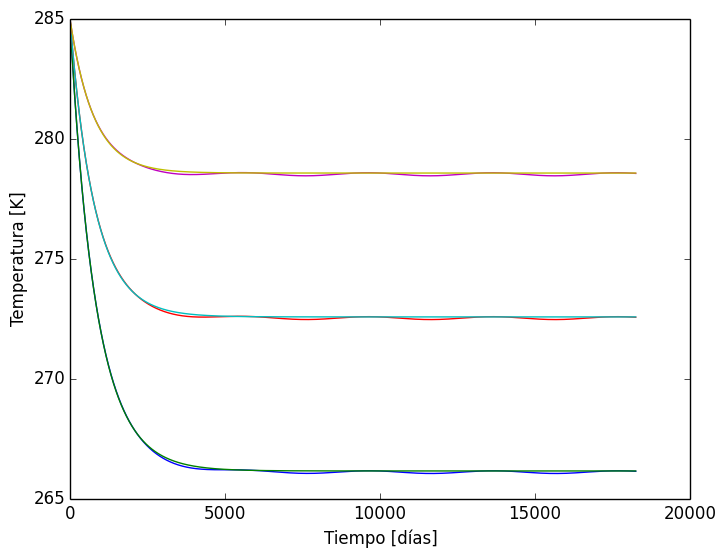

(278.58126894812125,50.0)

In [26]:
ordenCero_VariabilidaSolar(0.5, .6, δt, 365*50, 285)
modeloOrdenCero(0.5, 0.6,δt, γ, 285, 365*50)

ordenCero_VariabilidaSolar(0.45, .6, δt, 365*50, 285)
modeloOrdenCero(0.45, 0.6, δt, γ, 285, 365*50)

ordenCero_VariabilidaSolar(0.4, .6, δt, 365*50, 285)
modeloOrdenCero(0.4, 0.6, δt, γ, 285, 365*50)

La **última parte** de la experimentación consistió en calcular la temperatura de la superficie terrestre sin el efecto de una atmósfera. El efecto de la atmosfera en un EBM de orden cero se atribuye únicamente al parámetro $\epsilon$, pues éste parámetro representa que tan opaca es la atmósfera. Se propuso encontrar la temperatura con diferentes valores de la emisividad para así poder ver cómo es el cambio con dicho parámetro o sin él. Para simular un planeta sin atmósfera, usando el modelo con $S = 1370$, se tomó el valor de la emisividad igual a uno, lo que representa un planeta que se comporta como un cuerpo negro, es decir, radía toda la energía que absorbe del Sol. Esto hace que se enfríe más de lo que se enfriaría que con $\epsilon < 1$. Este parámetro de emisividad simula el efecto que tiene la atmósfera (de manera muy simplificada) en la temperatura de la superficie del planeta, cuando $\epsilon$ es menor a uno.
Los valores y sus resultados , se presentan a continuación:

- $\epsilon=0.01$: $[T_{eq}=453.36K]$,
- $\epsilon=0.2$: $[T_{eq}=381.23K]$,
- $\epsilon=0.4$: $[T_{eq}=320.57K]$,
- $\epsilon=0.6$: $[T_{eq}=289.66K]$,
- $\epsilon=0.8$: $[T_{eq}=269.7K]$,
- $\epsilon=1$: $[T_{eq}=255.06K]$. 

In [24]:
collect(0.2:0.2:1)

5-element Array{Float64,1}:
 0.2
 0.4
 0.6
 0.8
 1.0

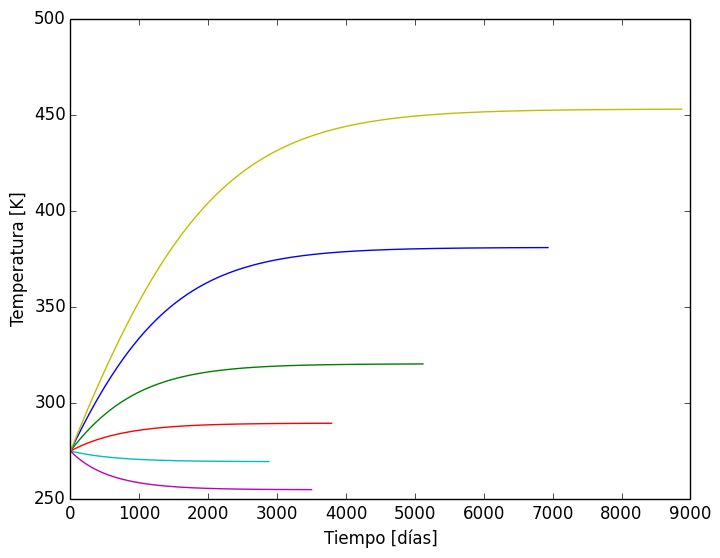

(453.0241575720417,24.30958904109589)

In [25]:
for i in 0.2:0.2:1

    modeloOrdenCero(0.3, i, δt, γ, 275)
end

modeloOrdenCero(0.3, 0.1, δt,γ, 275)

### Discusión

Primeramente, es notable que la presencia de una atmósfera en el modelo cero dimensional, representada con valores de albedo y emisividad, logra variar la temperatura de equilibrio de manera considerable (más de 10 grados de diferencia). 

Como segundo punto, se observa que para la variación de la temperatura fijando un valor de $\alpha =1$, dado que ocurre un reflejo de la radiación incidente, ocurre una disminución en la temperatura terrestre pues la radiación no alcanza a calentar al planeta. Dicha situación, con al albedo máximo, puede ser ejemplo del llamado $"Snow Ball Earth"$, en donde la Tierra estaba cubierta por completo por una capa de hielo.

Al variar la emisividad era de esperarse que a valores altos de emisividad la temperatura de equilibrio iba a ser menor que a emisividades mayores [Figure 2].Cabe mencionar que el tiempo en el que se logra el equilibrio dependerá de la temperatura inicial.%[Aquí podemos poner las temperaturas finales]

Al fijar una emisividad con (bajo) valor de $0.01$ y variar el albedo se observa [Figure 3] que a un albedo alto, como es $\alpha = 0.85$ el cual representa a la criosfera, la  temperatura evoluciona casi linealmente y en general deja temperaturas considerablemente bajas. Un caso similar es el de las nubes densas como las  Stratus y Cumulus con un $\alpha = 0.7$  para el cual también la temperatura en la que se alcanza el equilibrio es aun baja. Sin embargo a albedos menores la temperatura aumenta, debido a que al dejar pasar más radiación y la Tierra al no emitir la temperatura se "dispara" pudiendo llegar a temperaturas de casi $900 K$, como es el caso del bosque con un $\alpha = 0.05$, o bien el de nubes ligeras como las Cirrus con un $\alpha = 0.35$ [3] las cuales igualmente permiten un gran aumento de la temperatura.

Teniedo un valor (bajo) para el albedo como en el tercer caso [Figure 4] se observa que para diferentes valores del coeficiente de emisividad medio, la temperatura alcanzan la temperatura de equilibrio en un amplio rango de temperaturas. [$T_\textit{eq} = 303.32K$] en casi 11 años. Asimismo teniendo un valor máximo para el coeficiente,  la función también crece rápido pero no tanto como en el otro caso, pues llega  a la temperatura de equilibrio [$T_{eq} = 225K$] en un poco más de 10 años.

En cuanto a las variaciones debido a la constante solar, en general la temperatura cambia apenas por 0.2 grados, es decir que a pesar de que sí hay cierta variación, no presenta una afectación importante a la temperatura promedio de la Tierra, a comparación de otros parámetros ya estudiados anteriormente como lo son la emisividad y el albedo que sí muestran un mayor impacto en la temperatura de equilibrio, así como el tiempo en el que se llega a las mismas.

Finalmente, para el cálculo de la temperatura en la superficie terrestre sin efecto de la atmósfera, se experimento con los diferentes valores de $\epsilon$. Se puede ver que sin esta, es decir, en el caso que $\epsilon = 1$, la temperatura [$T_{eq} = 255.06K$] es más baja que en los otros cinco casos en los que no se considera la emisividad como la del cuerpo negro, sino, menor, pues la atmósfera sería transparente. En la Figura 7 se observa claramente cómo la temperatura de equilibrio va aumentando conforme el valores de $\epsilon$ va disminuyendo, pues la atmósfera va adquiriendo una mayor opacidad. 


### Conclusiones

Se concluyó que las variaciones de la temperatura de equilibrio depende de ciertos parámetros como el albedo, la emisividad, e incluso las variaciones en los ciclos solares, aunque cabe destacar que estas últimas no tienen una repercusión tan importante como los otros dos parámetros antes mencionados. 
Del mismo modo, las temperaturas de equilibrio tardan un tiempo dado por la temperatura inicial, es decir mientras más cercano el valor a la temperatura de equilibrio menor tiempo tardará en dejar de fluctuar.



### Referencias

\[1][{Ereño C., Seminario de Cambio Climático, Universidad de Buenos Aires, Disponible en línea en:
$http://www.filo.uba.ar/contenidos$ $/carreras/geografia/catedras/cambioclimatico$
$/sitio/sitio/Unidad$$\%$$204.pdf$}]

[2][{García Garrido V., Modelos Climáticos de Balance de Energía y resultados de Control para Modelos Discretizados, (2007), Universidad Complutense, Disponible en línea en: $http://www.mat.ucm.es/invesmat/wp-content/uploads/2011/11/trabajo-master-curso-2006-07-garcia-garrido.pdf$}]

[3][{Reyes-Coca, S., Introducción a la Meteorología, (2002), Universidad Autonoma de Baja California.}]

[4][{Holton, J. R., Introducción a la Meteorología Dinámica, (1979), Instituto Nacional de Meteorología, Prensa Hispanoamericana.}]

[5][{$http://ciencia.nasa.gov/ciencias-especiales/08jan_sunclimate/$}]

[6][{Warren S., The Frozen Ocean of the Snowball Earth, (2009), University of Washington, Disponible en línea en:
$https://www.pnnl.gov/atmospheric/seminars$
$/pdf/Snowball_earth_Warren.pdf$}]

[7][{NASA, Observatoria de Dinámica Solar: La misión del "Sol Variable",(2010), Disponible en línea en: $http://ciencia.nasa.gov/science-at-nasa/2010/05feb_sdo/$}]

